# Proyecto Final

### Carga de librerías a utilizar y data

In [655]:
import numpy as np
import pandas as pd
import math as mt
from matplotlib import pyplot as plt
import tensorflow as tf
from scipy.stats import norm
from numpy import random
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.svm import SVC


In [585]:
data = pd.read_csv('data_titanic_proyecto.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         891 non-null    int64  
 1   Name                891 non-null    object 
 2   Age                 714 non-null    float64
 3   SibSp               891 non-null    int64  
 4   Parch               891 non-null    int64  
 5   Ticket              891 non-null    object 
 6   Fare                891 non-null    float64
 7   Cabin               204 non-null    object 
 8   Embarked            889 non-null    object 
 9   passenger_class     891 non-null    object 
 10  passenger_sex       891 non-null    object 
 11  passenger_survived  891 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


In [586]:
data.head(2)

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Lower,M,N
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Upper,F,Y


#### Variables Continuas: Age, SibSp, Parch, Fare
#### Variables Discretas: Name,Ticket, Cabin, Enmarked., passenger_class, passenger_sex
#### Variable Target: passenger_survived.

## Variables que no son relevantes para el análisis:
* PassengerID
* Name --Realizaremos análisis en esta para ver si afecta---

In [587]:
x = data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]]
y = data.iloc[:,[11]]
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.20, random_state=42, shuffle = True)

In [588]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      712 non-null    int64  
 1   Name             712 non-null    object 
 2   Age              572 non-null    float64
 3   SibSp            712 non-null    int64  
 4   Parch            712 non-null    int64  
 5   Ticket           712 non-null    object 
 6   Fare             712 non-null    float64
 7   Cabin            159 non-null    object 
 8   Embarked         710 non-null    object 
 9   passenger_class  712 non-null    object 
 10  passenger_sex    712 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 66.8+ KB


#### Trabajando con data que tiene NAN

In [589]:
print(X_train.isnull().sum())

PassengerId          0
Name                 0
Age                140
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              553
Embarked             2
passenger_class      0
passenger_sex        0
dtype: int64


### Eliminamos la variable Cabin, que nos afectará en nuestro modelo

Text(0.5, 0, 'Densidad Variables')

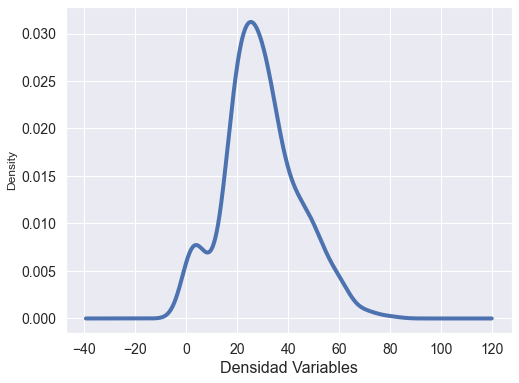

In [590]:
#Trabajando con NA's de Age
X_train["Age"].plot.density(figsize=(8,6),
                      fontsize=14,

                      linewidth=4)
plt.xlabel("Densidad Variables",size=16)


<AxesSubplot:title={'center':'Distribution of Age'}, ylabel='Frequency'>

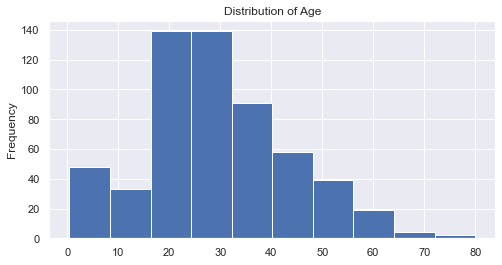

In [591]:
X_train['Age'].plot.hist(title='Distribution of Age')

In [592]:
#Agregando columnas para ver el comportamiento de la densidad y ver cual seleccionamos de ellas.
#Media
X_train["AgeMed"] = X_train["Age"].fillna(X_train["Age"].mean())
#Mediana
X_train["AgeMedi"] = X_train["Age"].fillna(X_train["Age"].median())
#Remplazo con 0
X_train["AgeCero"] = X_train["Age"].fillna(0)

#Reemplazando con números Random
X_train["AgeRand"] = X_train["Age"]
null_rows = X_train['AgeRand'].isnull()
num_null_rows = sum(null_rows)
rand = random.randint(1, 65, size=num_null_rows)
X_train.loc[null_rows, 'AgeRand'] = rand

<ipython-input-592-5360e510539f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["AgeMed"] = X_train["Age"].fillna(X_train["Age"].mean())
<ipython-input-592-5360e510539f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["AgeMedi"] = X_train["Age"].fillna(X_train["Age"].median())
<ipython-input-592-5360e510539f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [593]:
X_train["AgeMed"]

331    45.500000
733    23.000000
382    32.000000
704    26.000000
813     6.000000
         ...    
106    21.000000
270    29.498846
860    41.000000
435    14.000000
102    21.000000
Name: AgeMed, Length: 712, dtype: float64

In [594]:
print(X_train.isnull().sum())

PassengerId          0
Name                 0
Age                140
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              553
Embarked             2
passenger_class      0
passenger_sex        0
AgeMed               0
AgeMedi              0
AgeCero              0
AgeRand              0
dtype: int64


<AxesSubplot:ylabel='Density'>

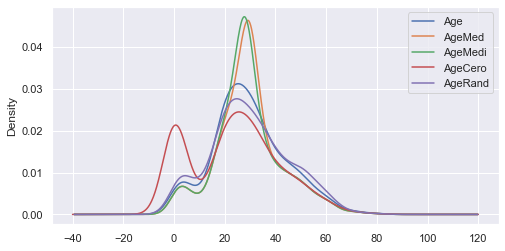

In [595]:
X_train[["Age", "AgeMed", "AgeMedi", "AgeCero", "AgeRand"]].plot.kde()

<AxesSubplot:title={'center':'Distribution of Age'}, ylabel='Frequency'>

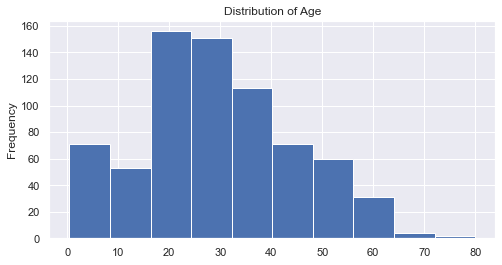

In [596]:
X_train['AgeRand'].plot.hist(title='Distribution of Age')

### La modificacion que menos nos modifica la densidad de nuestra variable es usando Random, esa seleccionaremos 

In [597]:
X_train.describe()

,PassengerId,Age,SibSp,Parch,Fare,AgeMed,AgeMedi,AgeCero,AgeRand
count,712.000000,572.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.234551,29.498846,0.553371,0.379213,32.586276,29.498846,29.204129,23.698511,29.663399
std,256.731423,14.500059,1.176404,0.791669,51.969529,12.994304,13.007971,17.507272,15.431064
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000,0.420000,0.000000,0.420000
25%,224.750000,21.000000,0.000000,0.000000,7.925000,22.000000,22.000000,5.000000,19.750000
50%,453.500000,28.000000,0.000000,0.000000,14.454200,29.498846,28.000000,24.000000,28.000000
75%,673.500000,38.000000,1.000000,0.000000,30.500000,35.000000,35.000000,35.000000,40.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200,80.000000,80.000000,80.000000,80.000000


## Identificando Outliers en Data

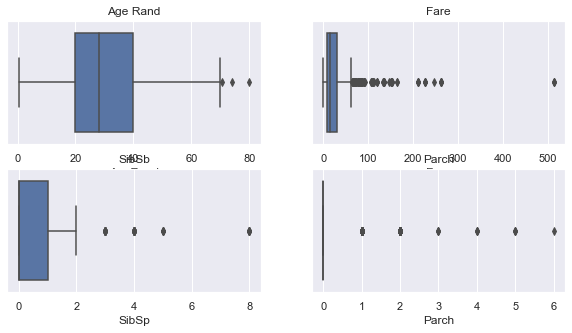

In [598]:
sns.set(rc={"figure.figsize": (10, 5)}); np.random.seed(0)
plt.subplot(2,2,1)
plt.title("Age Rand")
sns.boxplot(x=X_train['AgeRand'])

sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
plt.subplot(2,2,2)
plt.title("Fare")
sns.boxplot(x=X_train['Fare'])

sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
plt.subplot(2,2,3)
plt.title("SibSb")
sns.boxplot(x=X_train['SibSp'])

sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
plt.subplot(2,2,4)
plt.title("Parch")
sns.boxplot(x=X_train['Parch'])

plt.show()

### Trabajando variable Parch

In [599]:
X_train["Parch"].value_counts()

0    541
1     94
2     67
3      3
4      3
5      3
6      1
Name: Parch, dtype: int64

In [600]:
print(X_train['Parch'].quantile(0.10))

print(X_train['Parch'].quantile(0.90))

0.0
2.0


In [601]:
X_train["Parch"] = np.where(X_train["Parch"] > 2, 2,X_train["Parch"])

<ipython-input-601-200638deada0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["Parch"] = np.where(X_train["Parch"] > 2, 2,X_train["Parch"])


<AxesSubplot:title={'center':'Parch'}, xlabel='Parch'>

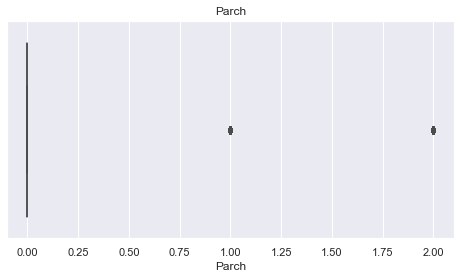

In [602]:
plt.title("Parch")
sns.boxplot(x=X_train['Parch'])

### Trabajando con variable SibSp

In [603]:
X_train["SibSp"].value_counts()

0    484
1    164
2     23
4     16
3     13
8      7
5      5
Name: SibSp, dtype: int64

In [604]:
print(X_train['SibSp'].quantile(0.10))

print(X_train['SibSp'].quantile(0.90))

0.0
1.0


In [638]:
X_train["SibSp"] = np.where(X_train["SibSp"] > 1, 1,X_train["SibSp"])
X_train["SibSp"] = np.where(X_train["SibSp"] < 0, 0,X_train["SibSp"])

<AxesSubplot:title={'center':'SibSp'}, xlabel='SibSp'>

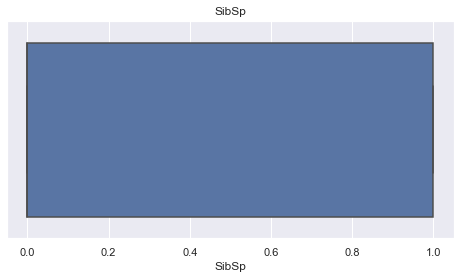

In [606]:
plt.title("SibSp")
sns.boxplot(x=X_train['SibSp'])

### Trabajando Variable Age

In [607]:
print(X_train['AgeRand'].quantile(0.10))

print(X_train['AgeRand'].quantile(0.90))

9.0
51.0


In [608]:
X_train["AgeRand"] = np.where(X_train["AgeRand"] < 9, 14,X_train["AgeRand"])

X_train["AgeRand"] = np.where(X_train["AgeRand"] > 60, 14,X_train["AgeRand"])

<ipython-input-608-85c29073bfbb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["AgeRand"] = np.where(X_train["AgeRand"] < 9, 14,X_train["AgeRand"])
<ipython-input-608-85c29073bfbb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["AgeRand"] = np.where(X_train["AgeRand"] > 60, 14,X_train["AgeRand"])


<AxesSubplot:title={'center':'AgeRand'}, xlabel='AgeRand'>

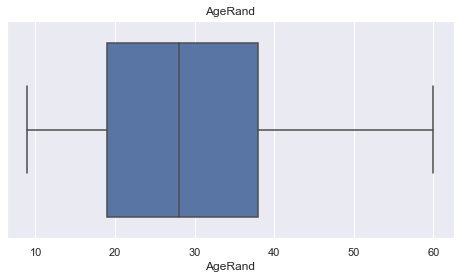

In [609]:
plt.title("AgeRand")
sns.boxplot(x=X_train['AgeRand'])

In [610]:
X_train.describe()

,PassengerId,Age,SibSp,Parch,Fare,AgeMed,AgeMedi,AgeCero,AgeRand
count,712.000000,572.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.234551,29.498846,0.320225,0.348315,32.586276,29.498846,29.204129,23.698511,29.423455
std,256.731423,14.500059,0.466891,0.666264,51.969529,12.994304,13.007971,17.507272,12.872335
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000,0.420000,0.000000,9.000000
25%,224.750000,21.000000,0.000000,0.000000,7.925000,22.000000,22.000000,5.000000,19.000000
50%,453.500000,28.000000,0.000000,0.000000,14.454200,29.498846,28.000000,24.000000,28.000000
75%,673.500000,38.000000,1.000000,0.000000,30.500000,35.000000,35.000000,35.000000,38.000000
max,891.000000,80.000000,1.000000,2.000000,512.329200,80.000000,80.000000,80.000000,60.000000


In [611]:
### Eliminamos variables que no utilizaremos
X_train = X_train.drop(["PassengerId","Age","AgeMed","AgeMedi","AgeCero", "Cabin", "Ticket", "Name"], axis=1)

In [612]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SibSp            712 non-null    int64  
 1   Parch            712 non-null    int64  
 2   Fare             712 non-null    float64
 3   Embarked         710 non-null    object 
 4   passenger_class  712 non-null    object 
 5   passenger_sex    712 non-null    object 
 6   AgeRand          712 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 44.5+ KB


In [613]:
X_train["passenger_class"].value_counts()

Lower     398
Upper     163
Middle    151
Name: passenger_class, dtype: int64

In [614]:
X_train["passenger_sex"].value_counts()

M    467
F    245
Name: passenger_sex, dtype: int64

In [615]:
X_train["Embarked"].value_counts()

S    525
C    125
Q     60
Name: Embarked, dtype: int64

In [616]:
DUM_pass_class = pd.get_dummies(X_train["passenger_class"], prefix='passenger_class')
DUM_pass_sex = pd.get_dummies(X_train["passenger_sex"], prefix='passenger_sex')
DUM_pass_embarked = pd.get_dummies(X_train["Embarked"], prefix='Embarked')
print(DUM_pass_sex)

     passenger_sex_F  passenger_sex_M
331                0                1
733                0                1
382                0                1
704                0                1
813                1                0
..               ...              ...
106                1                0
270                0                1
860                0                1
435                1                0
102                0                1

[712 rows x 2 columns]


In [617]:
#Agregando las nuevas variables despues del Dummy Enconding
X_train = pd.concat([X_train,DUM_pass_class,DUM_pass_sex, DUM_pass_embarked], axis=1)
#,DUM_pass_sex,DUM_pass_embarked

In [618]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SibSp                   712 non-null    int64  
 1   Parch                   712 non-null    int64  
 2   Fare                    712 non-null    float64
 3   Embarked                710 non-null    object 
 4   passenger_class         712 non-null    object 
 5   passenger_sex           712 non-null    object 
 6   AgeRand                 712 non-null    float64
 7   passenger_class_Lower   712 non-null    uint8  
 8   passenger_class_Middle  712 non-null    uint8  
 9   passenger_class_Upper   712 non-null    uint8  
 10  passenger_sex_F         712 non-null    uint8  
 11  passenger_sex_M         712 non-null    uint8  
 12  Embarked_C              712 non-null    uint8  
 13  Embarked_Q              712 non-null    uint8  
 14  Embarked_S              712 non-null    

In [619]:
#Quitando lass variables que ya no utilizamos, categoricas.

X_train = X_train.drop(["passenger_class","passenger_sex","Embarked"], axis=1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SibSp                   712 non-null    int64  
 1   Parch                   712 non-null    int64  
 2   Fare                    712 non-null    float64
 3   AgeRand                 712 non-null    float64
 4   passenger_class_Lower   712 non-null    uint8  
 5   passenger_class_Middle  712 non-null    uint8  
 6   passenger_class_Upper   712 non-null    uint8  
 7   passenger_sex_F         712 non-null    uint8  
 8   passenger_sex_M         712 non-null    uint8  
 9   Embarked_C              712 non-null    uint8  
 10  Embarked_Q              712 non-null    uint8  
 11  Embarked_S              712 non-null    uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 33.4 KB


## Transformación de Variables

In [620]:
X_train.describe()

,SibSp,Parch,Fare,AgeRand,passenger_class_Lower,passenger_class_Middle,passenger_class_Upper,passenger_sex_F,passenger_sex_M,Embarked_C,Embarked_Q,Embarked_S
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.320225,0.348315,32.586276,29.423455,0.558989,0.212079,0.228933,0.344101,0.655899,0.175562,0.084270,0.737360
std,0.466891,0.666264,51.969529,12.872335,0.496857,0.409068,0.420441,0.475408,0.475408,0.380714,0.277987,0.440378
min,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,7.925000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,14.454200,28.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,30.500000,38.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,2.000000,512.329200,60.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(array([ 13., 179., 107.,  90.,  26.,  29.,  72.,  31.,  10.,  14.,   5.,
          7.,   5.,  15.,  11.,   2.,   4.,  12.,   4.,  14.,   8.,   3.,
          6.,   1.,   0.,   0.,   2.,   5.,   1.,   0.,   3.,   0.,   0.,
          6.,   0.,   0.,   1.,   4.,   3.,   0.,   0.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   4.,   0.,   0.,
          0.,   4.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   5.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.

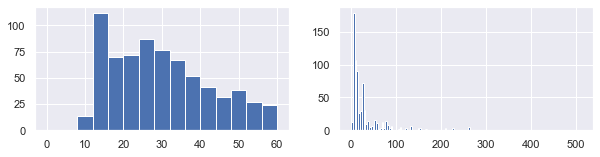

In [621]:
plt.figure(figsize = [10, 5])
plt.subplot(2, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, X_train['AgeRand'].max()+4, 4)
plt.hist(data = X_train, x = 'AgeRand', bins = bin_edges)


plt.subplot(2, 2, 2) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, X_train['Fare'].max(), 4)
plt.hist(data = X_train, x = 'Fare', bins = bin_edges)

In [622]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SibSp                   712 non-null    int64  
 1   Parch                   712 non-null    int64  
 2   Fare                    712 non-null    float64
 3   AgeRand                 712 non-null    float64
 4   passenger_class_Lower   712 non-null    uint8  
 5   passenger_class_Middle  712 non-null    uint8  
 6   passenger_class_Upper   712 non-null    uint8  
 7   passenger_sex_F         712 non-null    uint8  
 8   passenger_sex_M         712 non-null    uint8  
 9   Embarked_C              712 non-null    uint8  
 10  Embarked_Q              712 non-null    uint8  
 11  Embarked_S              712 non-null    uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 33.4 KB


In [623]:
mod_fare = X_train['Fare']
mod_age = X_train['AgeRand']
#X_train.transform([np.sqrt])

In [624]:
X_train['Age_Log'] = X_train['AgeRand'].apply(np.log)
X_train['Age_sqrt'] = X_train['AgeRand'].apply(np.sqrt)

<AxesSubplot:ylabel='Frequency'>

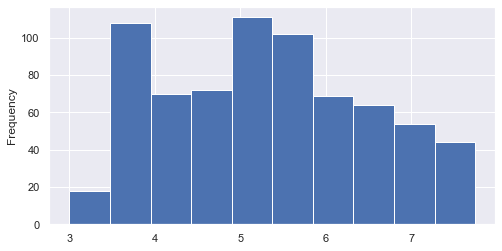

In [625]:
X_train['Age_sqrt'].plot.hist() # Esta viariable se queda

In [626]:
X_train['Fare_Log'] = X_train['Fare'].apply(np.log)
X_train['Fare_Sqrt'] = X_train['Fare'].apply(np.sqrt)

<AxesSubplot:ylabel='Frequency'>

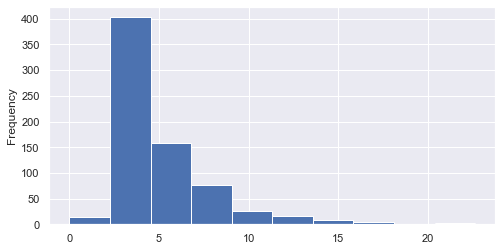

In [627]:
X_train['Fare_Sqrt'].plot.hist() # Esta viariable se queda

In [628]:
X_train = X_train.drop(["Fare_Log","Age_Log","AgeRand", "Fare"], axis=1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SibSp                   712 non-null    int64  
 1   Parch                   712 non-null    int64  
 2   passenger_class_Lower   712 non-null    uint8  
 3   passenger_class_Middle  712 non-null    uint8  
 4   passenger_class_Upper   712 non-null    uint8  
 5   passenger_sex_F         712 non-null    uint8  
 6   passenger_sex_M         712 non-null    uint8  
 7   Embarked_C              712 non-null    uint8  
 8   Embarked_Q              712 non-null    uint8  
 9   Embarked_S              712 non-null    uint8  
 10  Age_sqrt                712 non-null    float64
 11  Fare_Sqrt               712 non-null    float64
dtypes: float64(2), int64(2), uint8(8)
memory usage: 33.4 KB


## Feature Scaling

Text(0.5, 0, 'Densidad Variables')

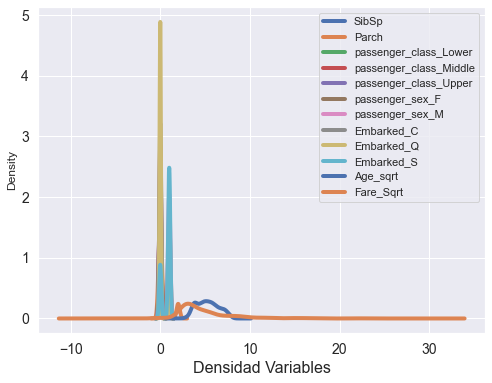

In [629]:
X_train.plot.density(figsize=(8,6),
                      fontsize=14,

                      linewidth=4)
plt.xlabel("Densidad Variables",size=16)

In [630]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SibSp                   712 non-null    int64  
 1   Parch                   712 non-null    int64  
 2   passenger_class_Lower   712 non-null    uint8  
 3   passenger_class_Middle  712 non-null    uint8  
 4   passenger_class_Upper   712 non-null    uint8  
 5   passenger_sex_F         712 non-null    uint8  
 6   passenger_sex_M         712 non-null    uint8  
 7   Embarked_C              712 non-null    uint8  
 8   Embarked_Q              712 non-null    uint8  
 9   Embarked_S              712 non-null    uint8  
 10  Age_sqrt                712 non-null    float64
 11  Fare_Sqrt               712 non-null    float64
dtypes: float64(2), int64(2), uint8(8)
memory usage: 33.4 KB


In [644]:
scaler = MinMaxScaler()
for column in X_train.columns:
    nombre = "scl_" + column
    print(nombre)
    X_train[nombre]= (X_train[column] - X_train[column].mean()) / X_train[column].std() 
    
    
#scaler.fit_transform(X_train[column])

scl_SibSp
scl_Parch
scl_passenger_class_Lower
scl_passenger_class_Middle
scl_passenger_class_Upper
scl_passenger_sex_F
scl_passenger_sex_M
scl_Embarked_C
scl_Embarked_Q
scl_Embarked_S
scl_Age_sqrt
scl_Fare_Sqrt


In [645]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SibSp                       712 non-null    int64  
 1   Parch                       712 non-null    int64  
 2   passenger_class_Lower       712 non-null    uint8  
 3   passenger_class_Middle      712 non-null    uint8  
 4   passenger_class_Upper       712 non-null    uint8  
 5   passenger_sex_F             712 non-null    uint8  
 6   passenger_sex_M             712 non-null    uint8  
 7   Embarked_C                  712 non-null    uint8  
 8   Embarked_Q                  712 non-null    uint8  
 9   Embarked_S                  712 non-null    uint8  
 10  Age_sqrt                    712 non-null    float64
 11  Fare_Sqrt                   712 non-null    float64
 12  scl_SibSp                   712 non-null    float64
 13  scl_Parch                   712 n

In [649]:
#Quitando variables no escaladas
X_train = X_train.drop(["SibSp","Parch","passenger_class_Lower", "passenger_class_Middle","passenger_class_Upper",
                       "passenger_sex_F","passenger_sex_M","Embarked_C","Embarked_Q","Embarked_S", "Age_sqrt",
                       "Fare_Sqrt"], axis=1)

Text(0.5, 0, 'Densidad Variables')

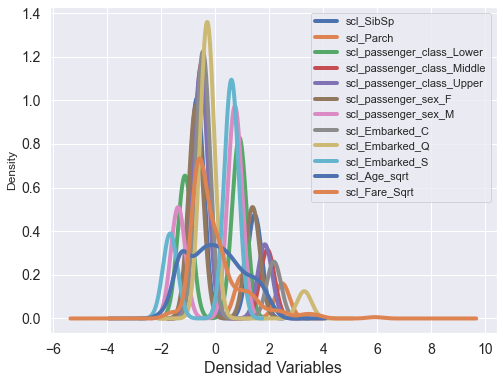

In [650]:
X_train.plot.density(figsize=(8,6),
                      fontsize=14,

                      linewidth=4)
plt.xlabel("Densidad Variables",size=16)

In [652]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

[Text(200.22667946257195, 212.26285714285714, 'X[6] <= -0.328\ngini = 0.469\nsamples = 712\nvalue = [444, 268]'),
 Text(74.00729366602687, 201.90857142857143, 'X[2] <= -0.119\ngini = 0.386\nsamples = 245\nvalue = [64, 181]'),
 Text(36.84299424184261, 191.5542857142857, 'X[10] <= -0.043\ngini = 0.074\nsamples = 130\nvalue = [5, 125]'),
 Text(25.704414587332053, 181.2, 'X[10] <= -0.292\ngini = 0.147\nsamples = 50\nvalue = [4, 46]'),
 Text(13.709021113243761, 170.84571428571428, 'X[11] <= -0.396\ngini = 0.087\nsamples = 44\nvalue = [2, 42]'),
 Text(6.8545105566218805, 160.49142857142857, 'X[10] <= -0.468\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(3.4272552783109402, 150.13714285714286, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(10.28176583493282, 150.13714285714286, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(20.56353166986564, 160.49142857142857, 'X[11] <= 2.252\ngini = 0.049\nsamples = 40\nvalue = [1, 39]'),
 Text(17.136276391554702, 150.13714285714286, 'gini = 0.0

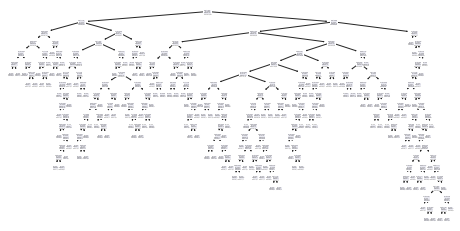

In [654]:
tree.plot_tree(clf) 